<a href="https://colab.research.google.com/github/Pedro4010/caseifood/blob/main/caseifood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/googlecolab/ml_project1_data.csv', index_col = 'ID')

Mounted at /content/drive


##### O conjunto de dados contém características sociodemográficas e firmográficas de cerca de 2.240 clientes que foram contatados. Além disso, contém um sinalizador para os clientes que responderam à campanha, comprando o produto.




**Feature** -> **Descrição**
*   AcceptedCmp1 -> 1 se o cliente aceitou a oferta na 1st campanha, 0 se não.
*   AcceptedCmp2 -> 1 se o cliente aceitou a oferta na 2st campanha, 0 se não.
*   AcceptedCmp3 -> 1 se o cliente aceitou a oferta na 3st campanha, 0 se não.
*   AcceptedCmp4 -> 1 se o cliente aceitou a oferta na 4st campanha, 0 se não.
*   AcceptedCmp5 -> 1 se o cliente aceitou a oferta na 5st campanha, 0 se não.
*   Response(target) -> 1 se o cliente aceitou a oferta na última campanha, 0 se não.
*   Complain -> 1 se o cliente reclamou nos últimos 2 anos
*   DtCustomer -> dados de cadastro do cliente na empresa
*   Education -> nível de instrução do cliente
*   Marital -> estado civil do cliente
*   Kidhome -> número de crianças pequenas na casa do cliente
*   Teenhome -> número de adolescentes na casa do cliente
*   Income -> renda familiar anual do cliente
*   MntFishProducts -> valor gasto em produtos de peixe nos últimos 2 anos 
*   MntMeatProducts -> valor gasto em produtos de carne nos últimos 2 anos
*   MntFruits -> valor gasto em produtos de frutas nos últimos 2 anos
*   MntSweetProducts -> valor gasto em produtos doces nos últimos 2 anos
*   MntWines -> valor gasto em produtos vitivinícolas nos últimos 2 anos
*   MntGoldProds -> valor gasto em produtos de ouro (especiais) nos últimos 2 anos
*   NumDealsPurchases -> número de compras feitas com desconto
*   NunCatalogPurchases -> número de compras feitas usando o catálogo
*   NunStorePurchases -> número de compras feitas diretamente nas lojas
*   NumWebPurchases -> número de compras feitas através do site da empresa 
*   NumWebVisitsMonth -> número de visitas ao site da empresa no último mês
*   Recency -> número de dias desde a última compra    












##### Neste notebook serão realizados os tratamentos dos dados. 

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

In [3]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,5,0,0,0,0,0,0,3,11,0
4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,7,0,0,0,1,0,0,3,11,0
7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,6,0,1,0,0,0,0,3,11,0


##### Em um primeiro olhar sobre o DataSet, optei por já eliminar algumas colunas que não fazem sentido em um primeiro momento. Dependendo do resultado das análises, talvez eu volte e acrescente-as.
##### A coluna ID do cliente se tornou meu índice, apenas um número de cadastro. Optei por remover as colunas Z_CostContact e Z_Revenue, visto que ambas possuem os mesmos valores por todo o DataSet. E como falei, em algum momento se achar relevante para o desenvolvimento da solução, elas podem ser recolocadas.

In [6]:
df['Z_CostContact'].value_counts()

3    2240
Name: Z_CostContact, dtype: int64

In [7]:
df['Z_Revenue'].value_counts()

11    2240
Name: Z_Revenue, dtype: int64

In [8]:
dfi = df.drop(columns=['Z_CostContact','Z_Revenue' ])

In [9]:
dfi

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,10,4,7,0,0,0,0,0,0,1
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,1,2,5,0,0,0,0,0,0,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,2,10,4,0,0,0,0,0,0,0
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,4,6,0,0,0,0,0,0,0
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,3,4,5,0,0,0,0,0,0,0
4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,2,5,7,0,0,0,1,0,0,0
7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,3,13,6,0,1,0,0,0,0,0


In [10]:
dfi.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [11]:
# Usei esse comando apenas para verificar como estavam os dados das colunas que não apareciam com default.
pd.set_option('max_columns',26)

In [12]:
dfi.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [25]:
# Verificando se há valores nulos. Como podemos ver, temos 24 valores nulos em Income. Vamos utilizar uma média para tratar esses valores.
# Em alguns casos, seria mais adequado uma regressão linear, por exemplo, mas neste caso, a média e a mediana estão bem próximas, e isso é um fator relevante.
dfi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2240 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0


In [22]:
# Verificando um possível outlier na coluna Income.
# Transformar em um valor nulo e corrigir junto com os outros valores nulos
# dfi[dfi['Income']==666666]. Foi verificado que é um outlier.
dfi['Income'] = dfi['Income'].replace(666666, np.nan)

In [ ]:
dfi.isnull().sum()

In [19]:
dfi['Income'].describe()

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: Income, dtype: float64

In [23]:
# Substituindo os valores nulos pela média.
# Rodamos o somatório de nulos novamente e a operação foi realizada. Não há mais valores nulos em dfi.
dfi['Income'] = dfi['Income'].replace(np.nan, dfi['Income'].mean())

In [36]:
# Criando uma coluna com o número de pessoas que aderiram a campanha. ????

dfi['Total_Accepted'] = df['AcceptedCmp1'] + dfi['AcceptedCmp2'] + dfi['AcceptedCmp3'] + dfi['AcceptedCmp4'] + dfi['AcceptedCmp5'] 

In [37]:
dfi['Total_Accepted'].value_counts()

0    1777
1     325
2      83
3      44
4      11
Name: Total_Accepted, dtype: int64

In [ ]:
dfi

,Year_Birth,Dt_Customer,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,1957,2012-09-04,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,0
1,1954,2014-03-08,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,2013-08-21,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,2014-02-10,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,2014-01-19,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2013-06-13,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,1946,2014-06-10,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,1,0,0,0,0,0,0
2237,1981,2014-01-25,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,0,0,1,0,0,0
2238,1956,2014-01-24,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


In [ ]:
# Transformando a coluna de Data.
dfi['Dt_Customer'] = pd.to_datetime(dfi['Dt_Customer'])

In [42]:
dfi['Age'] = datetime.now().year - dfi['Year_Birth'] 

In [48]:
dfi['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

In [54]:
# Em vez de pegar a data de hoje e ver há quanto tempo o cliente está, vamos olhar pelo cliente mais novo para o mais antigo.
dfi['Days_a_customer'] = dfi['Dt_Customer'].max() - dfi['Dt_Customer']

In [55]:
dfi

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Accepted,Age,Days_a_customer
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,...,10,4,7,0,0,0,0,0,0,1,0,65,663 days
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,...,1,2,5,0,0,0,0,0,0,0,0,68,113 days
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,...,2,10,4,0,0,0,0,0,0,0,0,57,312 days
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,...,0,4,6,0,0,0,0,0,0,0,0,38,139 days
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,...,3,6,5,0,0,0,0,0,0,0,0,41,161 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,...,3,4,5,0,0,0,0,0,0,0,0,55,381 days
4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,...,2,5,7,0,0,0,1,0,0,0,1,76,19 days
7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,...,3,13,6,0,1,0,0,0,0,0,1,41,155 days


In [ ]:
# dfi = dfi[['Year_Birth','Dt_Customer','Education','Marital_Status','Income','Kidhome',
#'Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts',
#'MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth',
#'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Complain']

#### Procurando entender as variáveis, e como tratá-las.

#### Em um primeiro momento, tentaremos olhar para a correlação e tentar entender o tipo de perfil de clientes que aceitaram a camapanha, em todas as fases.



In [ ]:
dfi.corr()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
Year_Birth,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818,-0.060846,-0.145040,-0.121275,-0.128272,0.121139,-0.005930,-0.006539,0.061774,-0.060510,0.007123,0.021325,-0.030128
Income,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,0.589162,0.529362,-0.553088,0.276820,0.087545,-0.016174,0.184400,0.335943,0.133047,-0.027225
Kidhome,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,-0.172339,-0.081716,0.014674,-0.161600,-0.205634,-0.080008,0.040207
Teenhome,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,-0.140090,-0.015605,-0.042677,0.038886,-0.191050,-0.154446,0.003138
Recency,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,-0.019283,-0.001781,-0.032991,0.018826,0.000129,-0.198437,0.013231
MntWines,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,0.354133,0.205907,0.062202,0.373286,0.472613,0.247254,-0.039007
MntFruits,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,0.194748,-0.009773,0.014727,0.010152,0.215833,0.125289,-0.005166
MntMeatProducts,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470,0.309761,0.043033,0.018272,0.102912,0.373769,0.236335,-0.023483
MntFishProducts,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003,0.260762,0.002577,0.000357,0.016843,0.199578,0.111331,-0.020953
MntSweetProducts,-0.018133,0.440744,-0.370673,-0.162475,0.022670,0.386581,0.567164,0.523846,0.579870,1.000000,0.369724,-0.120100,0.348544,0.490924,0.448756,-0.423294,0.241818,0.009985,0.001530,0.028641,0.259590,0.117372,-0.022485


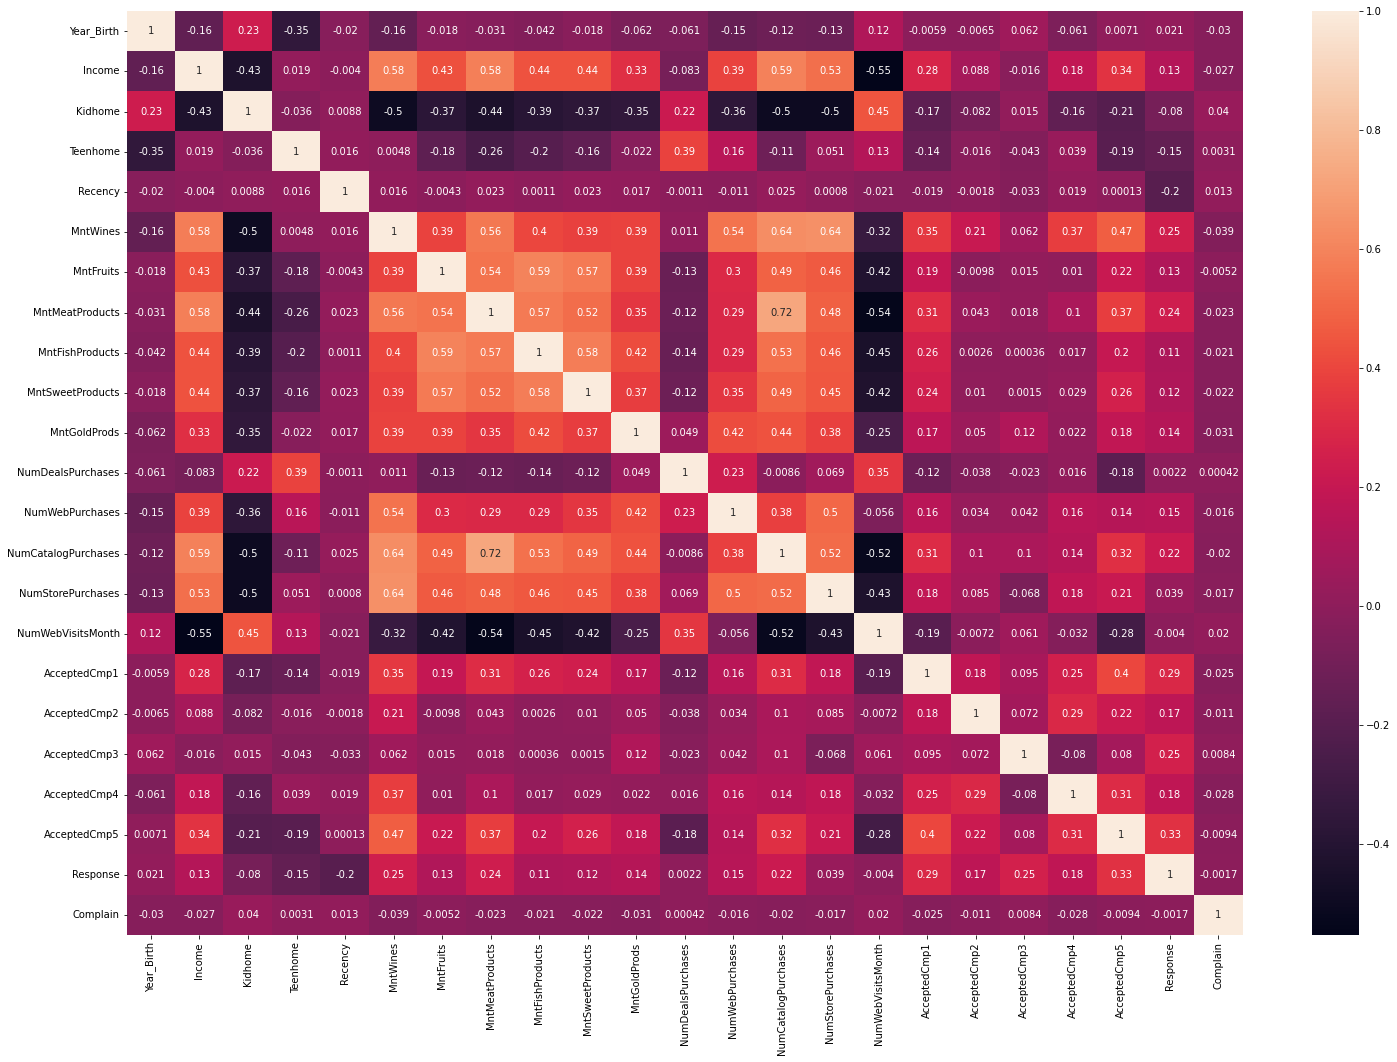

In [ ]:
plt.subplots(figsize=(25,17))
sns.heatmap(dfi.corr(), annot=True)

In [ ]:
dfi['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

### Função delta do pandas

In [ ]:
dfi['Dt_Customer'].min()

Timestamp('2012-07-30 00:00:00')